
Laboratorio 07: Análisis de Componentes Principales
=========================================

David Cardenas Peña, PhD. 

Edificio de Ingeniería Eléctrica, Oficina 1B-131

email: dcardenasp@utp.edu.co

# Objetivos

*   Implementar una técnica de reducción de dimensión
*   Aplicar técnicas de reducción de dimensión a un problema real.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')
t_train = data.iloc[:,0].to_numpy()
X_train = data.iloc[:,1:].to_numpy()

#Actividad 1: 
Implemente la reducción dimensión de PCA fijando la cantidad de nuevas caracterísiticas:

1. Centralice los datos: $\hat{x}_{nd}=x_{nd}-\mu_d$ (NOTAS: La media se calcula de cada columna. Use la opción `keepdims=True` para facilitar la resta y división).
2. Calcule la matriz de covarianza de los datos normalizados (NOTA: Las variables están en columnas, no en filas)
2. Calcule los valores y vectores propios de la matriz de covarianza (`np.linalg.eig`).
3. Seleccione como la matriz de transformación $U$ las primeras `n_components` columnas de la matriz de vectores propios
4. Proyecte las muestras normalizadas al espacio PCA haciendo $Y=XU$ (Nota: El producto es matricial).



Su matriz de covarianza es de (784, 784) y debe ser de (784, 784)
Su matriz U es de (784, 5) y debe ser de (784, 5)
Su matriz Y es de (19999, 5) y debe ser de (19999, 5)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


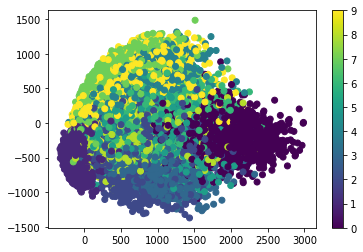

In [3]:
def pca_n_components(X,n_components=2):
  #X.shape = (N,D)
  
  #1. Normalizar
  X_hat = X - np.mean(X, axis=0, keepdims=True)
  #2. Calcular la matriz de covarianza
  C = np.cov(X_hat, rowvar = False)
  print('Su matriz de covarianza es de {} y debe ser de ({}, {})'.format(C.shape,X.shape[1],X.shape[1]))

  #3. Calcular los valores y vectores propios
  vals,vects = np.linalg.eig(C)

  #4. Construir la matriz U
  U = vects[:,:n_components]
  print('Su matriz U es de {} y debe ser de ({}, {})'.format(U.shape,X.shape[1],n_components))

  #5. Proyectar los datos normalizados
  Y = X@U
  print('Su matriz Y es de {} y debe ser de ({}, {})'.format(Y.shape,X.shape[0],n_components))

  return Y,np.real(U)

Y,U = pca_n_components(X_train,n_components=5)

plt.scatter(Y[:,0],Y[:,1],c=t_train)
plt.colorbar()
plt.show()

#Actividad 2:

Implemente la reducción dimensión de PCA fijando el porcentaje de varianza conservada:

1. Centralice los datos: $\hat{x}_{nd}=x_{nd}-\mu_d$ (NOTAS: La media se calcula de cada columna. Use la opción `keepdims=True` para facilitar la resta y división).
2. Calcule la matriz de covarianza de los datos normalizados (NOTA: Las variables están en columnas, no en filas)
2. Calcule los valores y vectores propios de la matriz de covarianza (`np.linalg.eig`).
3. Calcule la varianza total como la suma de todos los valores propios: $T=\sum_{d=1}^{D}{\lambda_d}$ 
4. Calcule el porcentaje de varianza acumulada como: $r_p=\frac{1}{T}\sum_{d=1}^{p}{\lambda_d}$ (NOTA: Use el método `cumsum`)
5. Encuentre la primera posición del vector $r$ que sea mayor a `explained_variance_ratio` y guárdela en la variable `n_components`
6. Seleccione como la matriz de transformación $U$ las primeras `n_components` columnas de la matriz de vectores propios
7. Proyecte las muestras normalizadas al espacio PCA haciendo $Y=XU$ (Nota: El producto es matricial).

Su matriz de covarianza es de (784, 784) y debe ser de (784, 784)
Para retener el 0.99 de la varianza se requieren 329 componentes


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


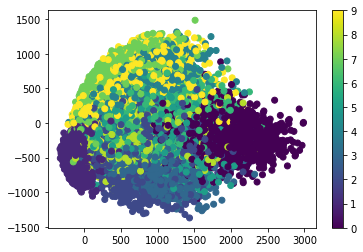

In [4]:
def pca_explained_variance(X,explained_variance_ratio=0.95):
  #X.shape = (N,D)
  
  #1. Normalizar
  X_hat = X - np.mean(X, axis=0, keepdims=True)
  
  #2. Calcular la matriz de covarianza
  C = np.cov(X_hat, rowvar = False)
  print('Su matriz de covarianza es de {} y debe ser de ({}, {})'.format(C.shape,X.shape[1],X.shape[1]))

  #3. Calcular los valores y vectores propios
  vals,vects = np.linalg.eig(C)

  #4. Calcular la varianza total
  T = np.sum(vals)

  #5. Calcular la tasa de varianza acumulada
  r = (1/T) * np.cumsum(vals)

  #6. Encontrar la cantidad de componentes
  #n_components = r[explained_variance_ratio]
  n_components = np.where(r>explained_variance_ratio)[0][0]

  #7. Construir la matriz U
  U = vects[:,:n_components]

  #8. Proyectar los datos normalizados
  Y = X@U

  print('Para retener el {} de la varianza se requieren {} componentes'.format(explained_variance_ratio,n_components))

  return Y,np.real(U)

from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True)
Y,U = pca_explained_variance(X_train, explained_variance_ratio=0.99)

plt.scatter(Y[:,0],Y[:,1],c=t_train)
plt.colorbar()
plt.show()

#Actividad 3:

1. Aplique `pca_n_components` para obtener la matriz de transformación $U$ con 25 componentes.
2. Dentro del ciclo:
  1.  Extraiga la $i$-ésima columna de la matriz $U$.
  2. Cambie la forma de la columna a $28 \times 28$.
  3. Haga `plt.imshow` de la columna convertida. 

Su matriz de covarianza es de (784, 784) y debe ser de (784, 784)
Su matriz U es de (784, 25) y debe ser de (784, 25)
Su matriz Y es de (19999, 25) y debe ser de (19999, 25)


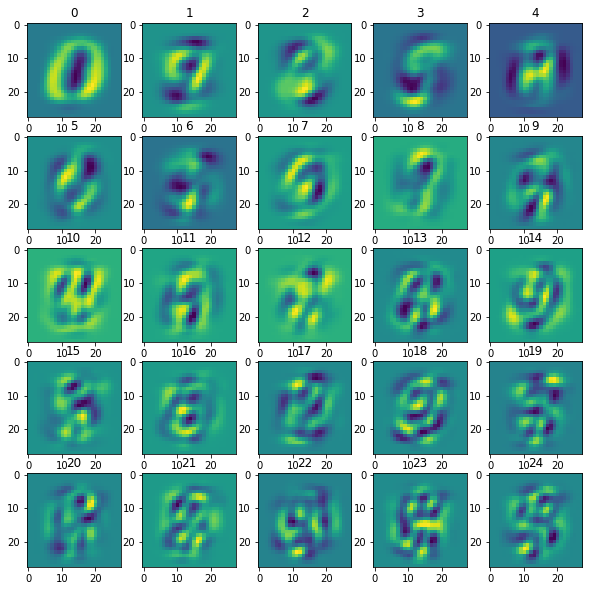

In [5]:
def eigendigits(X):
  #X.shape = (N,D) 
  Y,U = pca_n_components(X, n_components=25)
  
  plt.figure(figsize=(10,10))
  for c in range(25):
    plt.subplot(5,5,c+1)
    temp = U[:,c]
    temp = np.reshape(temp, (28,28))
    plt.imshow(temp)
    plt.title(c)
  
  plt.show()
   
  return

eigendigits(X_train)

#Actividad 4:
Repita la Actividad 1 empleando la implementación de PCA en scikit.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
acp = pca.fit(X_train).transform(X_train)
print(acp.shape)

(19999, 25)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


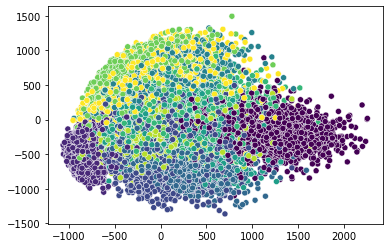

In [8]:
import seaborn as sns
sns.scatterplot(acp[:,0],acp[:,1],c=t_train)
sns.color_palette("viridis", as_cmap=True)
plt.show()

La verdad, por más que moví cosas, sigo sin saber porqué me da en blanco y negro, cuando comparo con la imagen de la actividad 1, se ve que las regiones coinciden, pero no obtengo la variación de color para una mayor visualización.

En el anterior comentario puse que la imagen estaba sin color, y era verdad, cuando reinicie el kernel para que la numeración de las celdas quedará en orden, esperaba el mismo resultado; pero sorpresa, sin tocar nada, la imagen salió como se esperaba.

Quize dejar esta anotación porque me parecio muy gracioso. A continuación dejo la imagen como estaba saliendo con el mismo codigó la cual me estaba desquiciando.

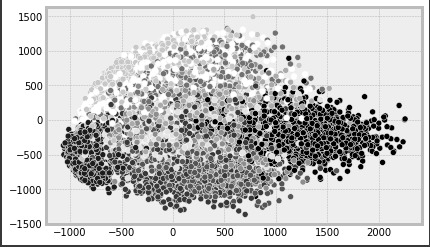